<a href="https://colab.research.google.com/github/Jorgee18/ADA-Informes/blob/main/Bellman_Ford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema de optimizacion**
**Entrada**: Un grafo dirigido $G=(V,E)$, un vértice fuente $s\in V$, y un valor real $l_e$ asociado a cada arco $e\in E$.

**Salida**: Dos posibles resultados:
1. La distancia más corta $dist(s,v)$ para cada vértice $v\in V$.
2. Una declaración indicando que $G$ contiene un ciclo negativo.

Problema de optimizacion en busca de encontrar el camino mas corto, este problema tal como su nombre lo indica consiste en encontrar una ruta que conecte a dos o mas nodos de modo que la distancia entre ellos sea minima y para su solucion sera ocupado el alogoritmo de optimizacion Bellman-Ford.

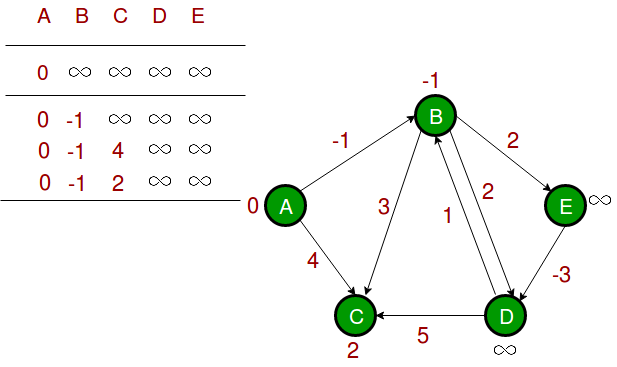

# 2 Descripcion del algoritmo

El algoritmo Bellman-Ford con programacion dinamica, busca encontrar el camino mas corto dentro de un grafo, ademas es un metodo que sirve para reducir el tiempo de ejecucion de un algoritmo mediante el uso de subproblemas y subestructuras optimas. Este algoritmo es correcto de usar en este tipo de problema debido a que siempre resuelve los subproblemas pensando en obtener una solucion global/general del problema.

Cabe recalcar que una de sus principales ventajas es que encuentra el camino mas corto incluso si este contiene arcos negativos, tambien cumple la funcion de identificar ciclos negativos es decir cuando este no tiene solucion.

Para resolver este problema con programacion dinamica debe de seguir los siguiente pasos:

1. Se inicializa todos los vertices y se establece su distancia, desde el nodo origen a cualquier nodo sera infinito, sin embargo la distancia de ese mismo nodo origen sera 0. 

2. Creamos dos ciclos iterativos(for) y anidados Donde mediante el uso de la subestructura optima lograremos encontrar el camino mas optimo para cada uno de los nodos originados en el grafo ademas de verificar si existe o no ciclos negativos.

3. Devolvemos los valores de distancia para todos los nodos una vez completadas todas las iteraciones.



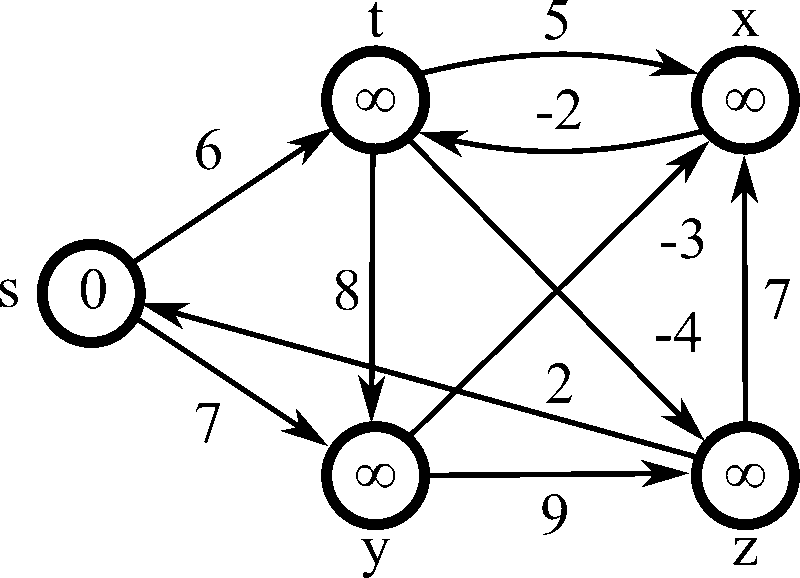

Algoritmo de Dijkstra al igual que como mencionamos anteriormente este algoritmo busca solucionar el problema del camino mas corto dentro de un grafo, pero con significativas diferencias respecto al Bullman-Ford debido que este no puede trabajar con aristas ni ciclos que sean negativos por lo que no puede de encontrar el camino mas optimo para conectar todo tipo de nodos, aunque para problemas con aristas positivas este lo solucionara de manera mas optima debdio a su modo de funcionamiento, ya que mientras Bullman-Ford busca el camino optimo de todos los nodos a nivel general el algoritmo de Dijkstra busca **''el''** camino mas optimo.

Para resolver este problema con el algoritmo de Dijkstra debe de seguir los siguiente pasos:

1. Marca el nodo inicial que elegiste con una distancia actual de 0 y el resto con infinito.

2. Establece el nodo no visitado con la menor distancia actual como el nodo actual A.

3. Para cada vecino V de tu nodo actual A: suma la distancia actual de A con el peso de la arista que conecta a A con V. Si el resultado es menor que la distancia actual de V, establécelo como la nueva distancia actual de V.

4. Marca el nodo actual A como visitado.

5. Si hay nodos no visitados, ve al paso 2.

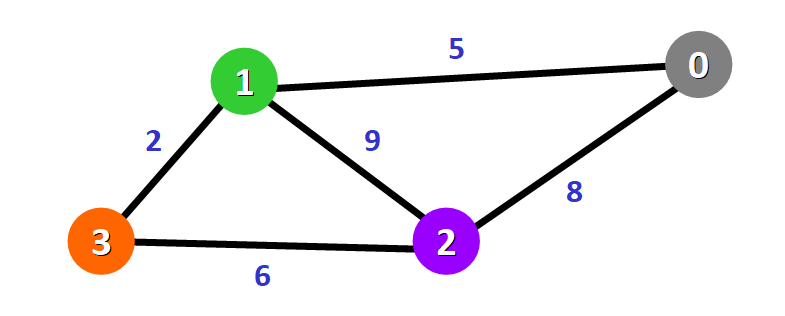

# 2.2 Algoritmo Bellman-Ford

A continuacion se moestrara codigo de su funcionamiento tanto de **Bellman-Ford** como de **Dijkstra**.

In [1]:
import random as rd
import matplotlib.pyplot as plt
import datetime
import math as mt
from timeit import repeat
from termcolor import colored
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from sys import maxsize


In [2]:
def graph_to_nxdigraph(graph: list, n: int):
    """
        Input: Un grafo en formato list[tuple]. Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph

In [3]:
import random

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

In [37]:
import random

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator2(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(1, 100)) # 1 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(1, 100)) # 1 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

In [17]:
def listT_to_matrix(graph, V):
    edges = len(graph)
    newGraph = [[0 for i in range(V)] for j in range(V)]

    for node in range(edges):
        for (x, y, peso) in graph:
            newGraph[x][y] = peso

    return newGraph

In [18]:
def minDistance(V, dist, visited):
    min = maxsize
    min_index = 0

    for u in range(V):
        if dist[u] < min and visited[u] == False:
            min = dist[u]
            min_index = u
    
    return min_index

In [63]:
def Dijkstra(graph, V ,src, verbose = False):
  if verbose:
    print("Datos de entrada:")
    print("Grafo:",graph)
    print("Cantidad de vertices:",V)
    print("Nodo de inicio",src)
    print("")

  dist = [maxsize] * V
  dist[src] = 0
  sptSet = [False] * V
  
  if verbose:
    print("Se recorre desde el nodo inicial hacia todos sus adyacentes\n")
    print("--------------------------------------------------------------------------------------------------------------------------------------------")
  for cout in range(V):

    x = minDistance(V, dist, sptSet)
    if verbose:
      print("Se busca la distancia minima")
      print("Distancia:",x)
 
    sptSet[x] = True
    if verbose:
      print("Se marca el nodo como visitado")

    for y in range(V):
      if verbose:
        print("Se busca el camino mas corto y procede a ser guardada en cada iteracion")
        if graph[x][y] > 0 and sptSet[y] == False and dist[y] > dist[x] + graph[x][y]:
          print("dist[y] = dist[x] + graph[x][y]")
          print(dist[y],"=",dist[x] + graph[x][y])
          print("")
        else:
          print("Debido a que no se cumple la siguiente condicion (graph[x][y] > 0 and sptSet[y] == False and dist[y] > dist[x] + graph[x][y])")
          print("Se sigue en la siguiente iteracion")
          print("")

      if graph[x][y] > 0 and sptSet[y] == False and dist[y] > dist[x] + graph[x][y]:
        dist[y] = dist[x] + graph[x][y]
    if verbose:
      print("--------------------------------------------------------------------------------------------------------------------------------------------")

  if verbose:  
    print("Vértice \Distancia desde la fuente")
    for node in range(V):
      print(node, "\t", dist[node])

In [4]:
#Algoritmo Bellman-Ford

def BellmanFord(graph, V, E, src, visualize = False, verbose = False):
	if verbose:
		print("Datos de entrada")
		print("Grafo:", graph)
		print("Cantidad de vertices:", V)
		print("Cantidad de nodos:", E)
		print("Nodo Inicio", src)
		print("")

	dis = [maxsize] * V
	dis[src] = 0

	if verbose: 
		print("Se recorre desde el nodo inicial hacia todos sus adyacentes\n")
  #Ciclos iterativos
	for i in range(V - 1):
		if verbose:
			print("Nodo Actual:",i)
		for j in range(E):
			if verbose:
				print("Se verifica la distancia entre los nodos",dis[graph[j][0]],"y", graph[j][2],", si esta es menor a ", dis[graph[j][1]])
				if dis[graph[j][0]] + graph[j][2] < dis[graph[j][1]]:
					print("Como esta distancia es menor se realiza el procedimiento de relajacion de los nodos")
					print("Donde esto quiere decir que los valores se van reduciendo de manera consecutiva\n")
				print("")
		
			if dis[graph[j][0]] + graph[j][2] < dis[graph[j][1]]:
				dis[graph[j][1]] = dis[graph[j][0]] + graph[j][2]
		if verbose:
			print("----------------------------------------------------------------------------------------------------------")
	
	for i in range(E):
		x = graph[i][0]
		y = graph[i][1]
		weight = graph[i][2]
		if dis[x] != maxsize and dis[x] + weight < dis[y]:
			if verbose:
				print("El gráfico contiene un ciclo de peso negativo")
	if verbose:
		print("Distancia del vértice desde la fuente")
		for i in range(V):
			print("%d\t\t%d" % (i, dis[i]))
	
	if visualize:
		grafo = graph_to_nxdigraph(graph,V)
		pos=nx.spring_layout(grafo,20)
		labels = nx.get_edge_attributes(grafo, "weight")
		nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels,font_size=14)
		nx.draw(grafo,pos, with_labels=True, node_size=800, font_color="white", font_size=14, font_weight="black", width  =2.0, edge_color ="green")



# 2.3. **Ejemplo Verbose Dijkstra**

In [64]:
a, b = instance_generator2(3)
grafo2 = listT_to_matrix(a, 3)
Dijkstra(a, len(grafo2), 0, True)  

Datos de entrada:
Grafo: [(1, 2, 32), (0, 1, 63), (2, 0, 68)]
Cantidad de vertices: 3
Nodo de inicio 0

Se recorre desde el nodo inicial hacia todos sus adyacentes

--------------------------------------------------------------------------------------------------------------------------------------------
Se busca la distancia minima
Distancia: 0
Se marca el nodo como visitado
Se busca el camino mas corto y procede a ser guardada en cada iteracion
Debido a que no se cumple la siguiente condicion (graph[x][y] > 0 and sptSet[y] == False and dist[y] > dist[x] + graph[x][y])
Se sigue en la siguiente iteracion

Se busca el camino mas corto y procede a ser guardada en cada iteracion
dist[y] = dist[x] + graph[x][y]
9223372036854775807 = 2

Se busca el camino mas corto y procede a ser guardada en cada iteracion
dist[y] = dist[x] + graph[x][y]
9223372036854775807 = 32

--------------------------------------------------------------------------------------------------------------------------------

# 2.4. **Ejemplo Bellman-Ford**

Se ingresa el grafo con los siguientes valores, tales como arco nodos y nodo fuente.

Grafo = [(5, 8, 21),(9, 0, 12),(0, 1, 31),(0, 42, 78)]

Siendo cada valor de la forma G(A,B,C):

A = Nodo de comienzo 

B = Nodo de Llegada

C = El peso entre sus distancias

1. Como primer paso se inicializan nuestras variables en infinito a excepcion, de nuestro valor de entrada de nodo fuente.  ej: dis[0,9999999,9999999]

2. Tras la inicializacion de nuestros valores comenzamos las iteraciones que buscaran el camino mas optimo.

  Para esto usaremos dos ciclos anidados, el primero funcionara desde los intervalos desde 0 hasta V - 1 y el otro desde 0 hasta E. Siendo V los vertices y E la cantidad de nodos.

  Tras estos ciclos anidados, preguntaremos dentro del segundo ciclo iterativo si dis[Grafo[0][0]] + Grafo[0][2] < dis[Grafo[0][1]] / 
  dis[graph[j][1]] = dis[graph[j][0]] + graph[j][2]:

  Siendo cada una de estas variables:

  Si (9999999 + 21) < 9999999:
  
    9999999 = 9999999 + 21

3. Estas iteraciones continuaran hasta revisar todos los caminos y encontrar el mas optimo. 








# 2.5. **Ejemplo Verbose Bellman-Ford**

In [70]:
g, v = instance_generator(5)
BellmanFord(g, 5, len(g), 0, False, True)  

Datos de entrada
Grafo: [(0, 4, 52), (3, 4, 98), (4, 1, 35), (2, 3, 52), (2, 4, 59), (1, 3, 25), (1, 0, 35), (1, 2, 40)]
Cantidad de vertices: 5
Cantidad de nodos: 8
Nodo Inicio 0

Se recorre desde el nodo inicial hacia todos sus adyacentes

Nodo Actual: 0
Se verifica la distancia entre los nodos 0 y 52 , si esta es menor a  9223372036854775807
Como esta distancia es menor se realiza el procedimiento de relajacion de los nodos
Donde esto quiere decir que los valores se van reduciendo de manera consecutiva


Se verifica la distancia entre los nodos 9223372036854775807 y 98 , si esta es menor a  52

Se verifica la distancia entre los nodos 52 y 35 , si esta es menor a  9223372036854775807
Como esta distancia es menor se realiza el procedimiento de relajacion de los nodos
Donde esto quiere decir que los valores se van reduciendo de manera consecutiva


Se verifica la distancia entre los nodos 9223372036854775807 y 52 , si esta es menor a  9223372036854775807

Se verifica la distancia entr

# 2.6. **Ejemplo Visualize Bellman-Ford**

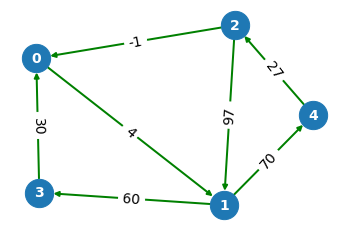

In [ ]:
g, v = instance_generator(5)
BellmanFord(g, 5, len(g), 0, True) 

# 3. Tiempo de ejecucion
## **Teorema (Tiempo de ejecucion).**

Peor caso.

## Prueba del teorema

# 4. Correctitud

### **Teorema (Correctitud).**

## Prueba del Teorema

**Inicializacion**

**Mantencion**

# 5. Experimentos

## 5.1. Número de comparaciones

A continuación se muestra gráficamente una comparación entre:

* cantidad de comparaciones del peor caso calculadas matemáticamente,
* cantidad de comparaciones del mejor caso calculadas matemáticamente (n-1 comparaciones si el arreglo está ordenado)
* cantidad de comparaciones realizadas experimentalmente para entradas aleatorias

para tamaños de problemas con $n \in [5,100]$.

Los arreglos de entrada son:

*   Mejor caso: La secuencia será un arreglo ordenado de $0$ hasta $n-1$.
*   Peor caso: La secuencia será un arreglo ordenado de $n-1$ hasta $0$.
*   Caso aleatorio: La secuencia será un arreglo aleatorio de números entre 1 y 99, con $n$ cantidad de elementos.

Como ejemplo del mejor y peor caso, se pueden observar las demostraciones anteriores, donde $n$ es reemplazado por 5.

### Análisis de resultados

#5.2. Tiempo de ejecucion (experimental)

**Analisis de resultados**